<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-21 13:45:46.658828


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

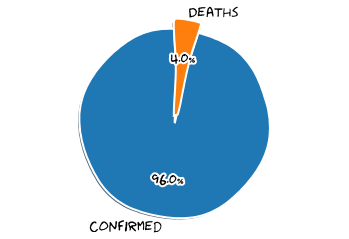

Alabama State Total Population
4887871
Alabama State Confirmed
13052 (0.2670283237835041% of population)
Alabama State Deaths
522 (3.999387067116151% of confirmed)



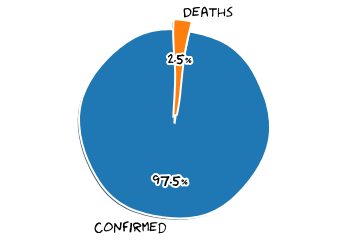

Alaska State Total Population
737438
Alaska State Confirmed
401 (0.05437745274857005% of population)
Alaska State Deaths
10 (2.493765586034913% of confirmed)



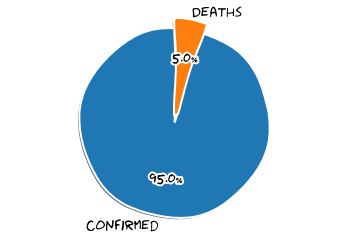

Arizona State Total Population
7171646
Arizona State Confirmed
14906 (0.20784628800696522% of population)
Arizona State Deaths
746 (5.004696095532% of confirmed)



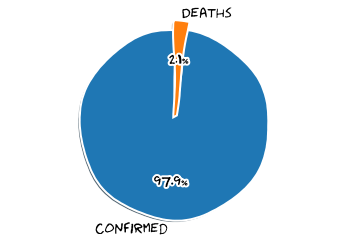

Arkansas State Total Population
3013825
Arkansas State Confirmed
5003 (0.16600167561155674% of population)
Arkansas State Deaths
107 (2.1387167699380374% of confirmed)



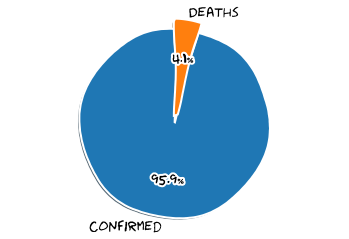

California State Total Population
39557045
California State Confirmed
85997 (0.21739995998184394% of population)
California State Deaths
3497 (4.0664209216600575% of confirmed)



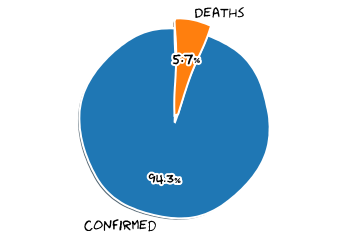

Colorado State Total Population
5695564
Colorado State Confirmed
22797 (0.40025886812965317% of population)
Colorado State Deaths
1299 (5.698118173443874% of confirmed)



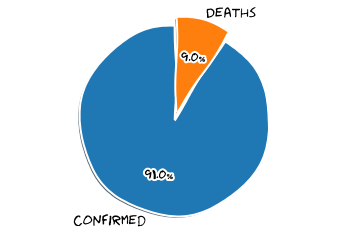

Connecticut State Total Population
3572665
Connecticut State Confirmed
39017 (1.092097915701584% of population)
Connecticut State Deaths
3529 (9.044775354332726% of confirmed)



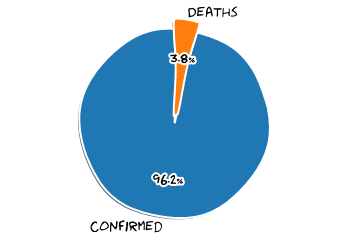

Delaware State Total Population
967171
Delaware State Confirmed
8194 (0.8472131608578009% of population)
Delaware State Deaths
310 (3.7832560410056137% of confirmed)



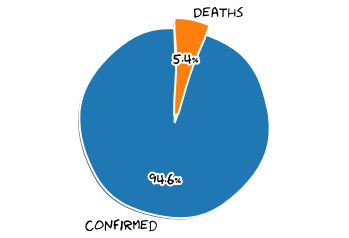

District of Columbia State Total Population
702455
District of Columbia State Confirmed
7551 (1.0749443024820096% of population)
District of Columbia State Deaths
407 (5.390014567606939% of confirmed)



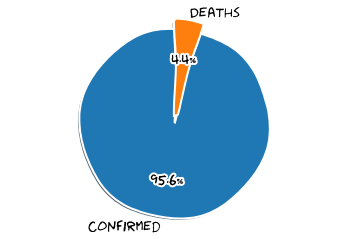

Florida State Total Population
21299325
Florida State Confirmed
47471 (0.2228756075603335% of population)
Florida State Deaths
2096 (4.415327252427798% of confirmed)



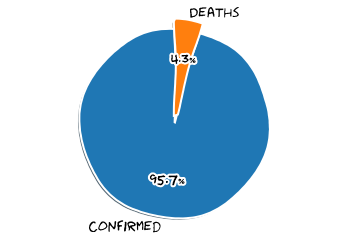

Georgia State Total Population
10519475
Georgia State Confirmed
39892 (0.379220445887271% of population)
Georgia State Deaths
1700 (4.261506066379224% of confirmed)



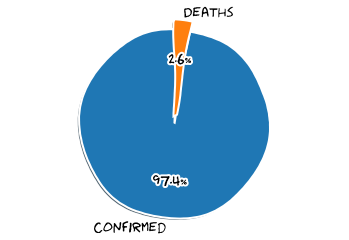

Hawaii State Total Population
1420491
Hawaii State Confirmed
643 (0.045266038292393264% of population)
Hawaii State Deaths
17 (2.6438569206842923% of confirmed)



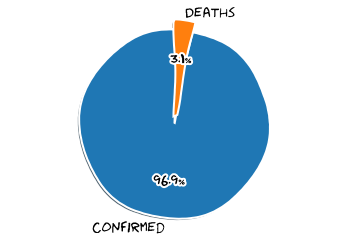

Idaho State Total Population
1754208
Idaho State Confirmed
2506 (0.14285649136248382% of population)
Idaho State Deaths
77 (3.072625698324022% of confirmed)



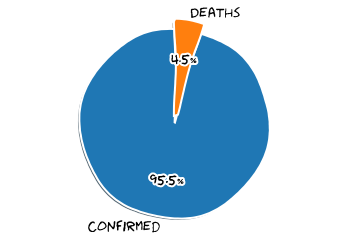

Illinois State Total Population
12741080
Illinois State Confirmed
100418 (0.7881435482706333% of population)
Illinois State Deaths
4525 (4.506164233503954% of confirmed)



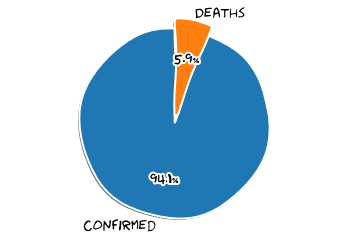

Indiana State Total Population
6691878
Indiana State Confirmed
29274 (0.4374556738780952% of population)
Indiana State Deaths
1716 (5.86185693789711% of confirmed)



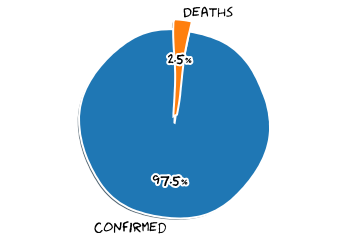

Iowa State Total Population
3156145
Iowa State Confirmed
15620 (0.494907553360191% of population)
Iowa State Deaths
393 (2.5160051216389245% of confirmed)



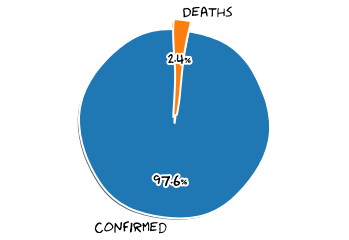

Kansas State Total Population
2911510
Kansas State Confirmed
8507 (0.2921851547822264% of population)
Kansas State Deaths
202 (2.374515105207476% of confirmed)



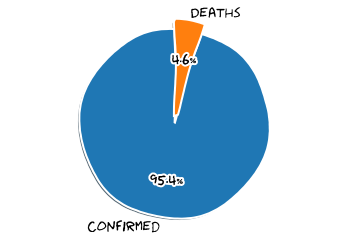

Kentucky State Total Population
4468402
Kentucky State Confirmed
8167 (0.18277227518920636% of population)
Kentucky State Deaths
376 (4.60389371862373% of confirmed)



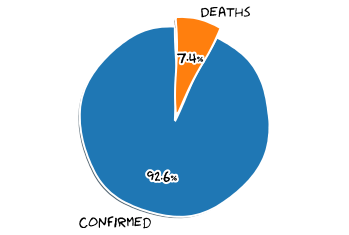

Louisiana State Total Population
4659978
Louisiana State Confirmed
35316 (0.757857655121977% of population)
Louisiana State Deaths
2608 (7.384754785366406% of confirmed)



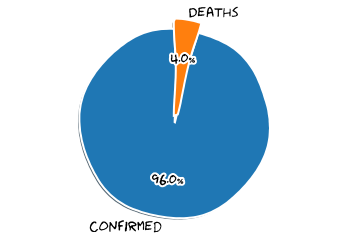

Maine State Total Population
1338404
Maine State Confirmed
1819 (0.13590814133848972% of population)
Maine State Deaths
73 (4.013194062671797% of confirmed)



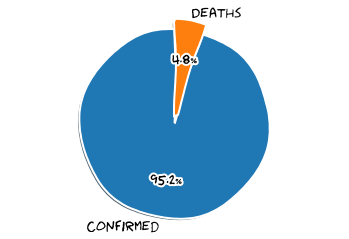

Maryland State Total Population
6042718
Maryland State Confirmed
42323 (0.7003967419959032% of population)
Maryland State Deaths
2049 (4.8413392245351226% of confirmed)



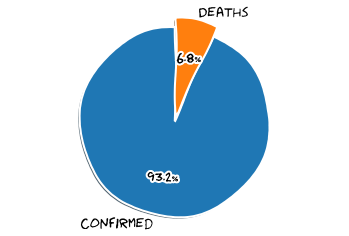

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
88970 (1.289018825875825% of population)
Massachusetts State Deaths
6066 (6.818028548949084% of confirmed)



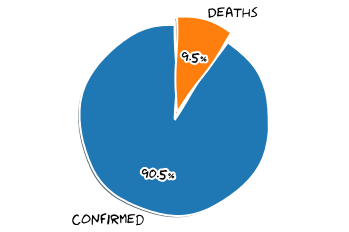

Michigan State Total Population
9995915
Michigan State Confirmed
52918 (0.5293962583715448% of population)
Michigan State Deaths
5051 (9.544956347556598% of confirmed)



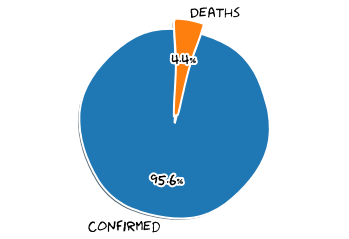

Minnesota State Total Population
5611179
Minnesota State Confirmed
17670 (0.3149070810252177% of population)
Minnesota State Deaths
786 (4.448217317487266% of confirmed)



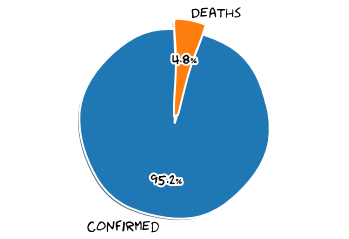

Mississippi State Total Population
2986530
Mississippi State Confirmed
11967 (0.4006991391347149% of population)
Mississippi State Deaths
570 (4.763098520932565% of confirmed)



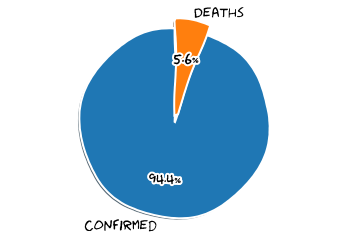

Missouri State Total Population
6126452
Missouri State Confirmed
11528 (0.18816763764736916% of population)
Missouri State Deaths
640 (5.551700208188757% of confirmed)



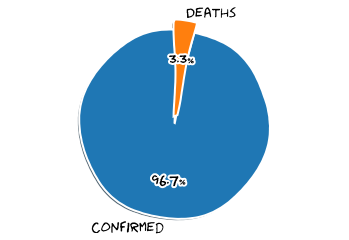

Montana State Total Population
1062305
Montana State Confirmed
478 (0.04499649347409642% of population)
Montana State Deaths
16 (3.3472803347280333% of confirmed)



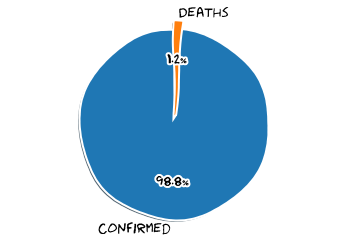

Nebraska State Total Population
1929268
Nebraska State Confirmed
11122 (0.576488077343324% of population)
Nebraska State Deaths
138 (1.240784031648984% of confirmed)



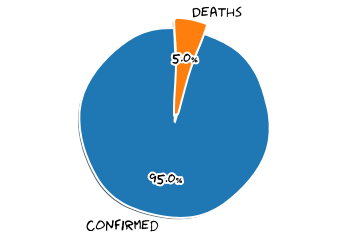

Nevada State Total Population
3034392
Nevada State Confirmed
7388 (0.24347546394796718% of population)
Nevada State Deaths
371 (5.021656740660531% of confirmed)



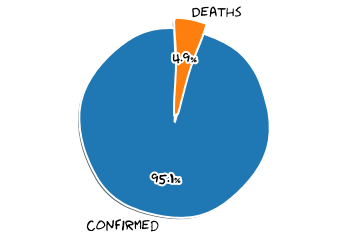

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
3868 (0.2851544242431391% of population)
New Hampshire State Deaths
190 (4.912099276111686% of confirmed)



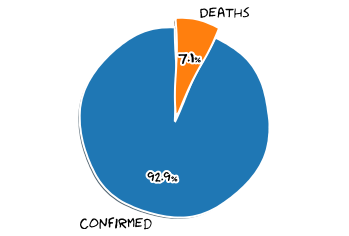

New Jersey State Total Population
8908520
New Jersey State Confirmed
150776 (1.692492131128403% of population)
New Jersey State Deaths
10749 (7.129118692630127% of confirmed)



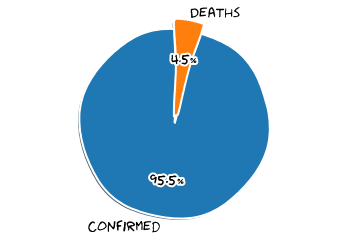

New Mexico State Total Population
2095428
New Mexico State Confirmed
6317 (0.30146585804904774% of population)
New Mexico State Deaths
283 (4.479974671521292% of confirmed)



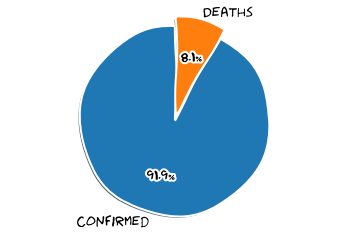

New York State Total Population
19542209
New York State Confirmed
354370 (1.8133569239792697% of population)
New York State Deaths
28636 (8.080819482461834% of confirmed)



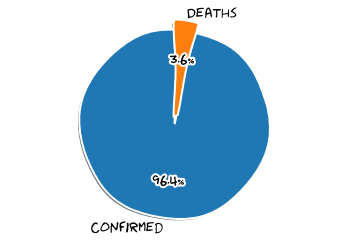

North Carolina State Total Population
10383620
North Carolina State Confirmed
20262 (0.19513425953569177% of population)
North Carolina State Deaths
726 (3.5830618892508146% of confirmed)



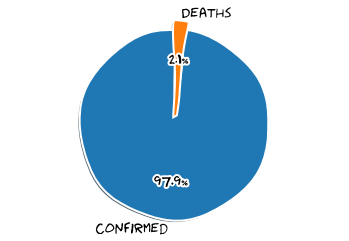

North Dakota State Total Population
760077
North Dakota State Confirmed
2095 (0.2756299690689233% of population)
North Dakota State Deaths
43 (2.052505966587112% of confirmed)



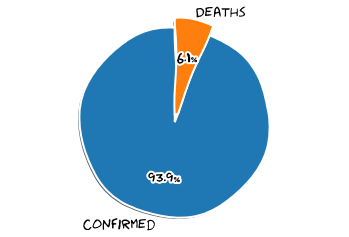

Ohio State Total Population
11689442
Ohio State Confirmed
29436 (0.2518169815120345% of population)
Ohio State Deaths
1781 (6.050414458486207% of confirmed)



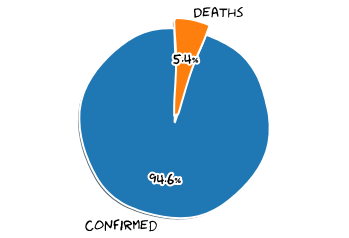

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
5532 (0.14029645360896903% of population)
Oklahoma State Deaths
299 (5.404916847433117% of confirmed)



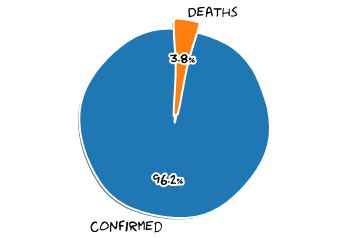

Oregon State Total Population
4190713
Oregon State Confirmed
3801 (0.09070055620606804% of population)
Oregon State Deaths
144 (3.7884767166535127% of confirmed)



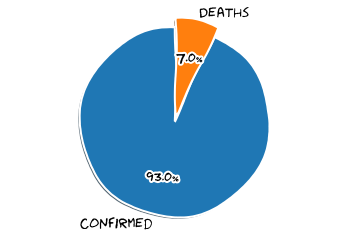

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
68126 (0.5319409763052566% of population)
Pennsylvania State Deaths
4770 (7.001732084666647% of confirmed)



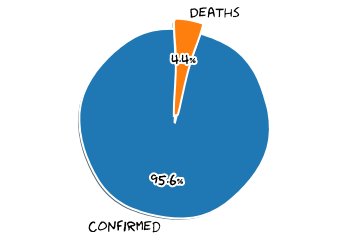

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
2866 (0.08969836499222417% of population)
Puerto Rico State Deaths
125 (4.361479413817166% of confirmed)



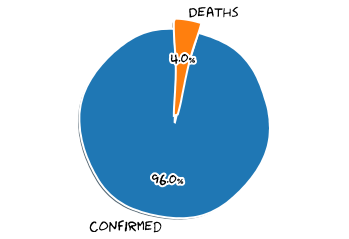

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
13356 (1.263199708696084% of population)
Rhode Island State Deaths
538 (4.028152141359689% of confirmed)



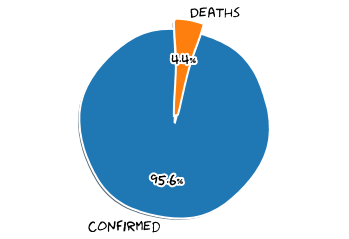

South Carolina State Total Population
5084127
South Carolina State Confirmed
9175 (0.18046362728547102% of population)
South Carolina State Deaths
407 (4.435967302452316% of confirmed)



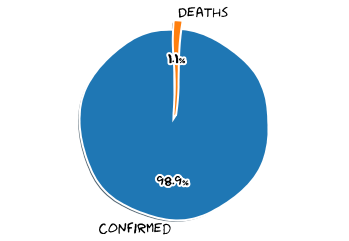

South Dakota State Total Population
882235
South Dakota State Confirmed
4177 (0.4734566187013664% of population)
South Dakota State Deaths
46 (1.101268853243955% of confirmed)



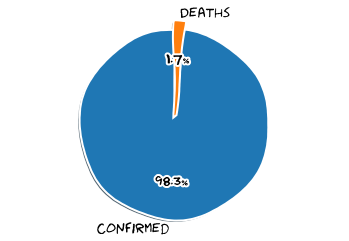

Tennessee State Total Population
6770010
Tennessee State Confirmed
18412 (0.27196414776344496% of population)
Tennessee State Deaths
305 (1.6565283510753857% of confirmed)



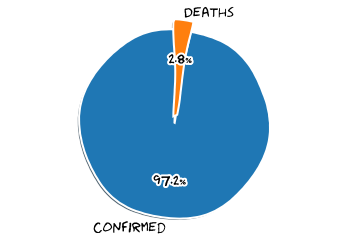

Texas State Total Population
28701845
Texas State Confirmed
51673 (0.1800337225707964% of population)
Texas State Deaths
1426 (2.759661718886072% of confirmed)



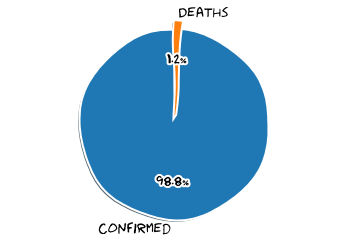

Utah State Total Population
3161105
Utah State Confirmed
7710 (0.24390205323771277% of population)
Utah State Deaths
90 (1.1673151750972763% of confirmed)



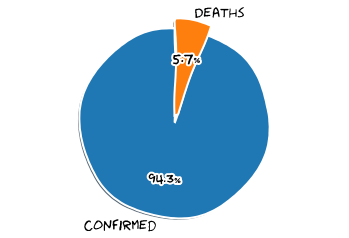

Vermont State Total Population
626299
Vermont State Confirmed
944 (0.15072672956527156% of population)
Vermont State Deaths
54 (5.720338983050848% of confirmed)



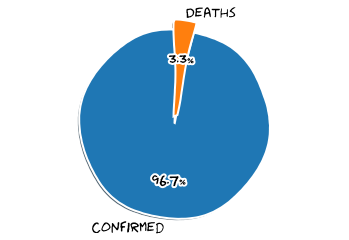

Virginia State Total Population
8517685
Virginia State Confirmed
32908 (0.3863491077681318% of population)
Virginia State Deaths
1075 (3.2666828734654185% of confirmed)



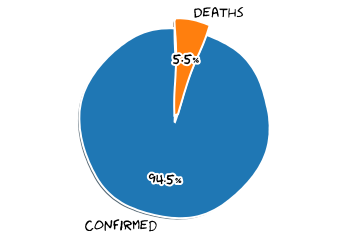

Washington State Total Population
7535591
Washington State Confirmed
18971 (0.2517519860087948% of population)
Washington State Deaths
1037 (5.466237942122187% of confirmed)



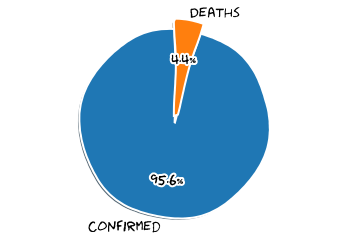

West Virginia State Total Population
1805832
West Virginia State Confirmed
1567 (0.086774406478565% of population)
West Virginia State Deaths
69 (4.403318442884493% of confirmed)



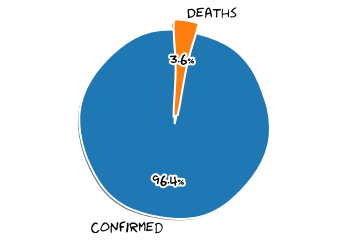

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
13413 (0.23071889758578554% of population)
Wisconsin State Deaths
481 (3.586073212554984% of confirmed)



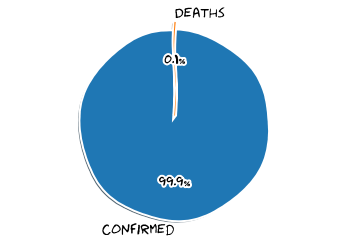

Wyoming State Total Population
577737
Wyoming State Confirmed
787 (0.13622115253134212% of population)
Wyoming State Deaths
1 (0.12706480304955528% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1551853
US Deaths
93188

New York City Confirmed
194550
New York City Deaths
20934

Philippines Confirmed
13434
Philippines Deaths
846



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 5022064},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 328639},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-21T12:32:43.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1913745},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-21 02:32:48,34.22333378,-82.46170658,36,0,0,36,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-21 02:32:48,30.2950649,-92.41419698,262,12,0,250,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-21 02:32:48,37.76707161,-75.63234615,709,11,0,698,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-21 02:32:48,43.4526575,-116.24155159999998,792,23,0,769,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-21 02:32:48,41.33075609,-94.47105874,6,0,0,6,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3389,,,,West Bank and Gaza,2020-05-21 02:32:48,31.9522,35.2332,398,2,346,50,West Bank and Gaza
3390,,,,Western Sahara,2020-05-21 02:32:48,24.2155,-12.8858,6,0,6,0,Western Sahara
3391,,,,Yemen,2020-05-21 02:32:48,15.552727,48.516388,184,30,5,149,Yemen
3392,,,,Zambia,2020-05-21 02:32:48,-13.133897,27.849332,832,7,197,628,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1590064363000,40.767273,-73.971526,194550,0,20934,173616,New York City,36061,"New York City, New York, US",2333.624452,None,None,84036061,USA
1,Illinois,US,1590064363000,41.841448,-87.816588,66213,0,3074,63139,Cook,17031,"Cook, Illinois, US",1285.631155,None,None,84017031,USA
2,California,US,1590064363000,34.308284,-118.228241,40895,0,1973,38922,Los Angeles,06037,"Los Angeles, California, US",407.356949,None,None,84006037,USA
3,New York,US,1590064363000,40.740665,-73.589419,39368,0,2065,37303,Nassau,36059,"Nassau, New York, US",2901.267868,None,None,84036059,USA
4,New York,US,1590064363000,40.883201,-72.801217,38411,0,1791,36620,Suffolk,36103,"Suffolk, New York, US",2601.312067,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,Kentucky,US,1590064363000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA
2938,Arkansas,US,1590064363000,35.189025,-91.243949,1,0,0,1,Woodruff,05147,"Woodruff, Arkansas, US",15.822785,None,None,84005147,USA
2939,Oklahoma,US,1590064363000,36.423163,-99.262830,1,0,0,1,Woodward,40153,"Woodward, Oklahoma, US",4.947801,None,None,84040153,USA
2940,Alaska,US,1590064363000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1590064363000,40.767273,-73.971526,194550,0,20934,173616,New York City,36061,"New York City, New York, US",2333.624452,None,None,84036061,USA
3,New York,US,1590064363000,40.740665,-73.589419,39368,0,2065,37303,Nassau,36059,"Nassau, New York, US",2901.267868,None,None,84036059,USA
4,New York,US,1590064363000,40.883201,-72.801217,38411,0,1791,36620,Suffolk,36103,"Suffolk, New York, US",2601.312067,None,None,84036103,USA
5,New York,US,1590064363000,41.162784,-73.757417,32517,0,1305,31212,Westchester,36119,"Westchester, New York, US",3360.909390,None,None,84036119,USA
19,New York,US,1590064363000,41.150279,-74.025605,12831,0,611,12220,Rockland,36087,"Rockland, New York, US",3938.438683,None,None,84036087,USA
23,New York,US,1590064363000,41.403375,-74.302408,10043,0,419,9624,Orange,36071,"Orange, New York, US",2608.978023,None,None,84036071,USA
57,New York,US,1590064363000,42.762490,-78.730637,5131,0,449,4682,Erie,36029,"Erie, New York, US",558.505370,None,None,84036029,USA
80,New York,US,1590064363000,41.764861,-73.743567,3724,0,126,3598,Dutchess,36027,"Dutchess, New York, US",1265.728134,None,None,84036027,USA
107,New York,US,1590064363000,43.146389,-77.693229,2465,0,174,2291,Monroe,36055,"Monroe, New York, US",332.313251,None,None,84036055,USA
135,New York,US,1590064363000,43.004919,-76.199712,1718,0,103,1615,Onondaga,36067,"Onondaga, New York, US",373.050064,None,None,84036067,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

354370

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1590064363000,40.767273,-73.971526,194550,0,20934,173616,New York City,36061,"New York City, New York, US",2333.624452,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
75,None,Philippines,1590064363000,12.879721,121.774017,13434,3000,846,9588,None,None,Philippines,12.259415,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
